In [33]:
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas import DataFrame

In [2]:
os.getcwd()

'/Users/mac'

In [3]:
df=pd.read_excel('Shopify.xlsx',index_col=0)

In [4]:
df.isnull().sum()

shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 6 columns):
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 273.4+ KB


In [37]:
df.head(10)

,shop_id,user_id,order_amount,total_items,payment_method,created_at,freq
order_id,,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56,48
2,92,925,90,1,cash,2017-03-03 17:38:52,18
3,44,861,144,1,cash,2017-03-14 04:23:56,19
4,18,935,156,1,credit_card,2017-03-26 12:43:37,75
5,18,883,156,1,credit_card,2017-03-01 04:35:11,75
6,58,882,138,1,credit_card,2017-03-14 15:25:01,25
7,87,915,149,1,cash,2017-03-01 21:37:57,23
8,22,761,292,2,cash,2017-03-08 02:05:38,41
9,64,914,266,2,debit,2017-03-17 20:56:50,56


In [6]:
metric=df.describe()

In [7]:
print(metric)

           shop_id      user_id   order_amount  total_items
count  5000.000000  5000.000000    5000.000000   5000.00000
mean     50.078800   849.092400    3145.128000      8.78720
std      29.006118    87.798982   41282.539349    116.32032
min       1.000000   607.000000      90.000000      1.00000
25%      24.000000   775.000000     163.000000      1.00000
50%      50.000000   849.000000     284.000000      2.00000
75%      75.000000   925.000000     390.000000      3.00000
max     100.000000   999.000000  704000.000000   2000.00000


In [8]:
Avo = df['order_amount'].mean()

In [9]:
print('Avarage Value Order is :',Avo)

Avarage Value Order is : 3145.128


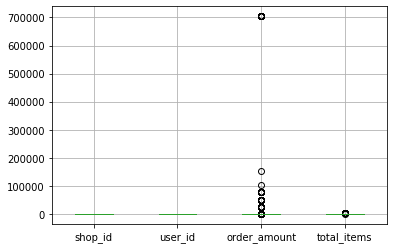

In [10]:
df.boxplot()

In [23]:
df_amountFreq = df
df_amountFreq['freq'] = df_amountFreq.groupby('order_amount')['order_amount'].transform('count')

In [24]:
df['order_amount'].quantile()
Q1=df_amountFreq['order_amount'].quantile(0.25)
Q3=df_amountFreq['order_amount'].quantile(0.75)
IQR= Q3-Q1


In [25]:
filtered = df_amountFreq.query('(@Q1 - 1.5 * @IQR) <= order_amount <= (@Q3 + 1.5 * @IQR)')

{'whiskers': [<matplotlib.lines.Line2D at 0x126b83650>,
 'caps': [<matplotlib.lines.Line2D at 0x126b2fcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x126b40590>],
 'medians': [<matplotlib.lines.Line2D at 0x126b40450>],
 'fliers': [<matplotlib.lines.Line2D at 0x126b55b90>],
 'means': []}

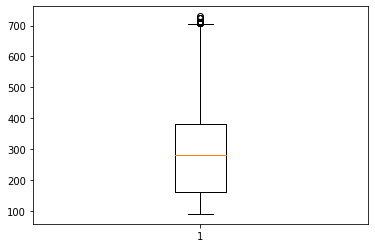

In [26]:
plt.boxplot(filtered.order_amount)

In [20]:
Avo=filtered['order_amount'].median()

In [21]:
print('Avarage Value Order is :',Avo)

Avarage Value Order is : 280.0


In [22]:
outliers=len(df_amountFreq)-len(filtered)
print('Number of OutLiers ', outliers)

Number of OutLiers  141
